In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [27]:
df=pd.read_csv("data/stud.csv")
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


math_score is my independent feature,
rest all is my dependent feature

In [28]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [29]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [30]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [31]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [32]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
X.shape

(1000, 7)

In [33]:
# create column transformer with 2 types of transformers

num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [36]:
X=preprocessor.fit_transform(X)

In [37]:
X.shape

(1000, 19)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after Model Training


In [40]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [42]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #Train

    # Predications
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and Test Dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Sqauread Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absoulte Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-----------------------------------------------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Sqauread Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absoulte Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Sqauread Error: 5.3244
- Mean Absoulte Error: 4.2671
- R2 Score: 0.8743
-----------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Sqauread Error: 5.3960
- Mean Absoulte Error: 4.2158
- R2 Score: 0.8803


Lasso
Model Performance for Training Set
- Root Mean Sqauread Error: 6.5938
- Mean Absoulte Error: 5.2063
- R2 Score: 0.8071
-----------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Sqauread Error: 6.5197
- Mean Absoulte Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Sqauread Error: 5.3233
- Mean Absoulte Error: 4.2650
- R2 Score: 0.8743
-----------------------------------------------------------------------
Model Performance for Test Set
- Root Mean Sqauread Error: 5.3904
- Mean Absoulte Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Tr

In [44]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.852389
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.849714
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.735307


## Linear Regression

In [45]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

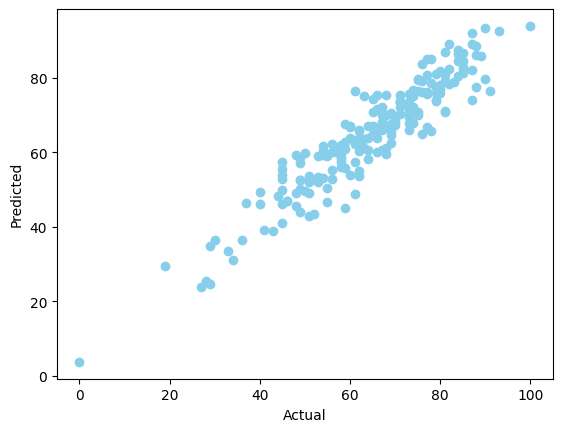

In [ ]:
plt.scatter(y_test,y_pred,color='skyblue')
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math_score'>

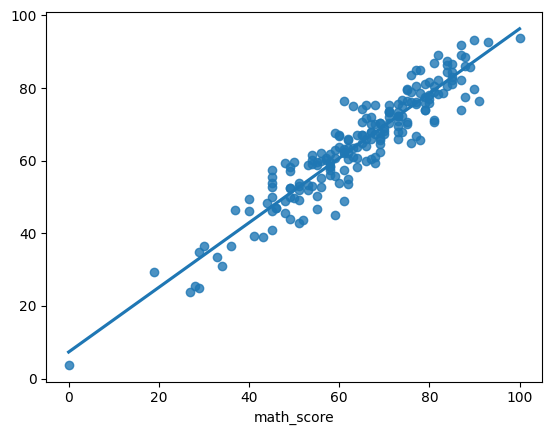

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None) #ci: Confidence Interval


In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicated Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicated Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
